## Playing with elliptic curves from LMFDB

Read in data files (= output from LMFDB https://www.lmfdb.org/) and check what's been added to the environment:

In [1]:
datafile = "./data/ec_rk0_cond7500-10000.sage"

load(datafile)
%who

data	 datafile	 labels	 make_data	 


Eyeball the top of the data sets:

In [5]:
from pprint import pprint

pprint(labels[:10])
pprint(data[:10])

['7501.a1',
 '7502.b1',
 '7502.b2',
 '7502.b3',
 '7502.b4',
 '7502.c1',
 '7503.c1',
 '7503.c2',
 '7504.b1',
 '7504.f1']
[[1, 1, 0, -6, 5],
 [1, -1, 0, -40013, -3070721],
 [1, -1, 0, -3713, 4131],
 [1, -1, 0, -2503, -47415],
 [1, -1, 0, -83, -1435],
 [1, -1, 0, 43477, 8737669],
 [1, 0, 1, -395, -2779],
 [1, 0, 1, -90, 271],
 [0, 0, 0, -3646, -84737],
 [0, -1, 0, -13196, -579056]]


The vectors are the EC coefficients, as we see from applying the function make_data():

In [6]:
ecdat = make_data()

pprint(ecdat[:10])
print( type(ecdat[0]) )

[Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 6*x + 5 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 - x^2 - 40013*x - 3070721 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 - x^2 - 3713*x + 4131 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 - x^2 - 2503*x - 47415 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 - x^2 - 83*x - 1435 over Rational Field,
 Elliptic Curve defined by y^2 + x*y = x^3 - x^2 + 43477*x + 8737669 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - 395*x - 2779 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 - 90*x + 271 over Rational Field,
 Elliptic Curve defined by y^2 = x^3 - 3646*x - 84737 over Rational Field,
 Elliptic Curve defined by y^2 = x^3 - x^2 - 13196*x - 579056 over Rational Field]
<class 'sage.schemes.elliptic_curves.ell_rational_field.EllipticCurve_rational_field_with_category'>


So ecdat[] is a list of elliptic curve objects. For example:

In [7]:
E = ecdat[0]
help(E)

Help on EllipticCurve_rational_field_with_category in module sage.schemes.elliptic_curves.ell_rational_field object:

class EllipticCurve_rational_field_with_category(EllipticCurve_rational_field, sage.categories.schemes.Schemes_over_base.parent_class)
 |  EllipticCurve_rational_field_with_category(ainvs, **kwds)
 |  
 |  Elliptic curve over the Rational Field.
 |  
 |  INPUT:
 |  
 |  - ``ainvs`` -- a list or tuple `[a_1, a_2, a_3, a_4, a_6]` of
 |    Weierstrass coefficients
 |  
 |  .. NOTE::
 |  
 |      This class should not be called directly; use
 |      :class:`sage.constructor.EllipticCurve` to construct
 |      elliptic curves.
 |  
 |  EXAMPLES:
 |  
 |  Construction from Weierstrass coefficients (`a`-invariants), long form::
 |  
 |      sage: E = EllipticCurve([1,2,3,4,5]); E
 |      Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
 |  
 |  Construction from Weierstrass coefficients (`a`-invariants),
 |  short form (sets `a_1 = a_2 = a_

We can now apply all the built-in sage functions for elliptic curves:

In [26]:
E = ecdat[0][1]

print(E)
print(f'Conductor {E.conductor()}')

p = Primes().unrank(1) # n-th prime number
for _ in range(10):
    print(f'p = {p}: nr points = {E.Np(p)}')
    p = next_prime(p)

Elliptic Curve defined by y^2 + x*y = x^3 + x^2 - 6*x + 5 over Rational Field
Conductor 7501
p = 3: nr points = 2
p = 5: nr points = 8
p = 7: nr points = 4
p = 11: nr points = 9
p = 13: nr points = 13
p = 17: nr points = 11
p = 19: nr points = 25
p = 23: nr points = 28
p = 29: nr points = 20
p = 31: nr points = 29


Let's try reproducing the 'murmuration' plots in https://arxiv.org/abs/2204.10140

In [2]:
datafile0 = "./data/ec_rk0_cond7500-10000.sage"
datafile1 = "./data/ec_rk1_cond7500-10000.sage"
datafile2 = "./data/ec_rk2_cond7500-10000.sage"

r = 0
ecdat = []

for df in [datafile0, datafile1, datafile2]:
    data = []
    load(df)
    tmp = make_data()
    ecdat += [[r,E] for E in tmp]
    r += 1

In [11]:
import time

def a(E,p):
    return p+1-E.Np(p)

def f(r,n):
    p = Primes().unrank(n)
    arr = [a(e[1],p) for e in ecdat if e[0] == r]
    return round( sum(arr)/len(arr), 12 )


size = 1000
rg = range(1,size + 1)

start = time.time()
murmur0 = [f(0,n) for n in rg]
murmur1 = [f(1,n) for n in rg]
murmur2 = [f(2,n) for n in rg]
end = time.time()

print(f'Running time {end - start}')

Running time 251.66415691375732


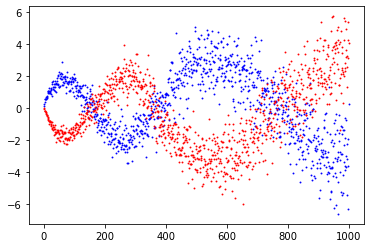

In [13]:
from matplotlib import pyplot as plt

plt.scatter(rg, murmur0, s = 0.8, c = 'blue')
plt.scatter(rg, murmur1, s = 0.8, c = 'red')
#plt.scatter(rg, murmur2, s = 0.8, c = 'green')
plt.show()